# Detección de Outliers

Los datos que usaremos en este notebook, "DS_Clase_13_Data_1.csv" y "DS_Clase_13_Data_2.csv",  fueron simulados con algún criterio desconocido. Uno de los archivos contiene "valores atípicos" y el otro no. El objetivo de este Notebook es que decidan en cuál de ellos hay outliers y apliquen las técnicas vistas para detectarlos.

## Ejercicios

Analizar, siguiendo las siguientes instrucciones, el archivo "DS_Clase_13_Data_1.csv". No se olviden de ir escribiendo las conclusiones a las que llegan a medida que avancen. Una vez completado, repetir para "DS_Clase_13_Data_2.csv".

1. Exploración de datos.
    1. Abrir los datos y explorarlos. Para ello, recomendamos hacer un `distplot` y un `boxplot`. ¿Hay valores atípicos? Si los hay, ¿en qué región del dominio?
    2. Calcular algunos estadísticos sobre la muestra: valor medio, desviación estándar, cuartiles, máximo, mínimo, etc.
2. Reescaleo de datos
    1. Agregar al dataframe una columna que se llame "Datos_Reescalados" y que contenga los datos reescalados por Z-Score. ¿Cuál es el valor medio de los datos reescalados?¿Y su desviación estándar? **Nota:** Para reescalar los datos, pueden hacerlo "a mano" o utilizar la clase `StandardScaler` de Scikit-Learn. No te olvides que las herramientas de preprocesamiento de datos de Scikit-learn tienen los mismos métodos (crear el objeto, fitearlo, transfromar los datos). Si necesitás ayuda, podés consultar la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
    2. Realizá, en un mismo gráfico, un histograma de los datos reescaleados y un histograma de los datos crudos. ¿Qué similitudes y qué diferencias tiene con la distribución de datos crudos?
3. Manejo de Outliers
    1. Aplicar la técnica del rango interquartílico y la regla de las tres sigmas para seleccionar outliers. ¿Cuántos valores selecciona cada técnica?¿Seleccionan los mismos valores?
    2. Supongamos que seleccionamos outliers y los descartamos. ¿Qué pasa si volvemos a aplicar estas técnicas?
    

### 1. Exploración de Datos

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [2]:
data1 = pd.read_csv('DS_Clase_13_Data_1.csv')
data2 = pd.read_csv('DS_Clase_13_Data_2.csv')
print(data1.head())
print(data2.head())

      Datos
0  1.879296
1  4.938045
2  3.758143
3  2.070839
4  7.823892
      Datos
0  1.879296
1  4.938045
2  3.758143
3  2.070839
4  7.823892


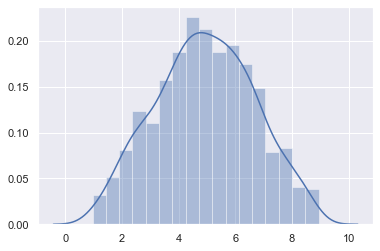

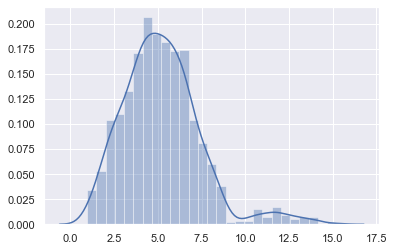

In [4]:
plt.figure()
sns.distplot(data1, hist=True, kde=True)
plt.figure()
sns.distplot(data2, hist=True, kde=True)

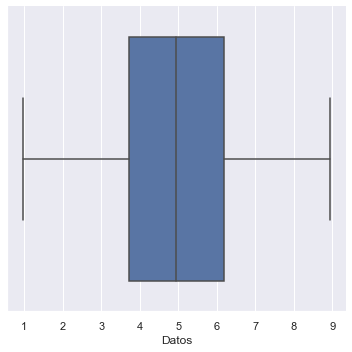

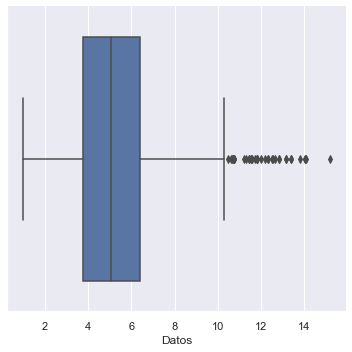

In [6]:
sns.catplot(x='Datos', kind='box' , data=data1)
sns.catplot(x='Datos', kind='box' , data=data2)

### 2. Reescaleo de datos

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
for data in [data1, data2]:
    std = data.Datos.std()
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    data['Datos_Reescalados'] = data_scaled
    print(data.head())

      Datos  Datos_Reescalados
0  1.879296          -1.763479
1  4.938045           0.002038
2  3.758143          -0.679003
3  2.070839          -1.652919
4  7.823892           1.667756
      Datos  Datos_Reescalados
0  1.879296          -1.495389
1  4.938045          -0.127278
2  3.758143          -0.655022
3  2.070839          -1.409716
4  7.823892           1.163499


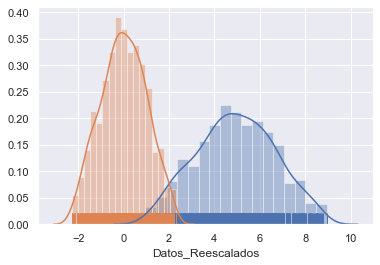

In [63]:
sns.distplot(data1['Datos'], hist=True, kde=True, rug=True)
sns.distplot(data1['Datos_Reescalados'], hist=True, kde=True, rug=True)

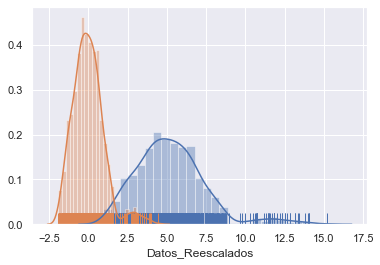

In [64]:
sns.distplot(data2['Datos'], hist=True, kde=True, rug=True)
sns.distplot(data2['Datos_Reescalados'], hist=True, kde=True, rug=True)

### 3. Manejo de outliers

1. Rango intercuartílico.

In [65]:
q25,q75 = data1['Datos'].quantile([.25,.75])
iqr = q75 - q25
minimo = data1.Datos.min()
maximo = data1.Datos.max()

print(q25,q75,iqr, minimo, maximo)

3.7206041309064553 6.19502940691846 2.4744252760120045 0.008966216888448564 9.906667320936467


In [72]:
mascara_outliers = np.logical_or(data1.Datos < (q25 - 1.5*iqr), data1.Datos > (q75 + 1.5*iqr))
mascara_outliers.sum()

0

In [74]:
q25,q75 = data2['Datos'].quantile([.25,.75])
iqr = q75 - q25
minimo = data2.Datos.min()
maximo = data2.Datos.max()

print(q25,q75,iqr, minimo, maximo)

3.7343638426457346 6.401368800504408 2.6670049578586736 0.95669821719908 15.206177277485398


In [75]:
mascara_outliers = np.logical_or(data2.Datos < (q25 - 1.5*iqr), data2.Datos > (q75 + 1.5*iqr))
mascara_outliers.sum()

38

2. Regla de las tres sigmas

In [ ]:
valor_medio = data1['Datos'].mean()
std = data1['Datos'].std()
minimo = data1['Datos'].min()
maximo = data1['Datos'].max()

In [76]:
mascara_outliers = np.logical_or(data1.Datos < (valor_medio - 3*std), data1.Datos > (valor_medio + 3*std))
mascara_outliers.sum()

0

In [77]:
valor_medio = data2['Datos'].mean()
std = data2['Datos'].std()
minimo = data2['Datos'].min()
maximo = data2['Datos'].max()

In [78]:
mascara_outliers = np.logical_or(data2.Datos < (valor_medio - 3*std), data2.Datos > (valor_medio + 3*std))
mascara_outliers.sum()

18

**Para pensar**: ¿se podía aplicar más fácilmente la regla de las tres sigmas usando la columna `Datos_Reescalados`?

In [80]:
mascara_outliers = np.logical_or(data2.Datos_Reescalados < -3, data2.Datos_Reescalados > 3)
mascara_outliers.sum()

18